In [148]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [149]:
N = 1000
std = 0.6
bananas = pd.DataFrame({
    'length': np.random.normal(10, std, N),
    'width': np.random.normal(4, std, N),
    'class': np.zeros(N, dtype='int')}
)

apples = pd.DataFrame({
    'length': np.random.normal(5, std, N),
    'width': np.random.normal(5, std, N),
    'class': np.ones(N, dtype='int')}
)

fruits = pd.concat([bananas, apples])
fruits.head(2)

,length,width,class
0,10.419314,3.885006,0
1,9.516912,3.655321,0


Text(0, 0.5, 'Width')

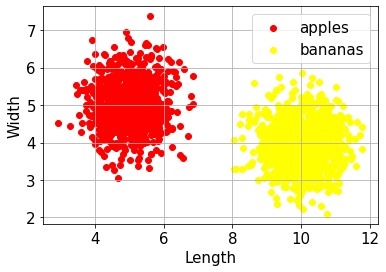

In [150]:
plt.scatter(x=apples['length'], y=apples['width'], label='apples' , c = "red")
plt.scatter(x=bananas['length'], y=bananas['width'], label='bananas', c = 'yellow')
plt.legend()
plt.grid()
plt.xlabel('Length')
plt.ylabel('Width')

In [151]:
height = [fruits.loc[fruits['class'] == 0, 'length'].mean(), #میانگین طول موزها 
          fruits.loc[fruits['class'] == 1, 'length'].mean(), #میانگین طول سیب ها
          fruits.loc[fruits['class'] == 0, 'width'].mean(), #میانگین عرض موزها
          fruits.loc[fruits['class'] == 1, 'width'].mean()] #میانگین عرض سیب ها
height


[10.003545401042457, 5.015662775568635, 3.9772723470680122, 5.013794574550004]

In [152]:
yerr = [2*fruits.loc[fruits['class'] == 0, 'length'].std(), #انحراف معیار طول موزها 
        2*fruits.loc[fruits['class'] == 1, 'length'].std(), # انحراف معیار طول سیب ها
        2*fruits.loc[fruits['class'] == 0, 'width'].std(), #انحراف معیار عرض موزها
        2*fruits.loc[fruits['class'] == 1, 'width'].std()] #انحراف معیار عرض سیب ها
yerr

[1.2314073457288717,
 1.1739228292725872,
 1.2009744975214214,
 1.2153201237810454]

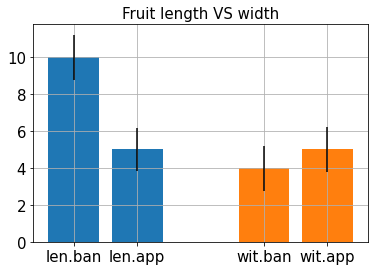

In [153]:
color = ['tab:blue', 'tab:blue', 'tab:orange', 'tab:orange']
labels = ['len.ban', 'len.app', 'wit.ban', 'wit.app']
x = [1, 1.5, 2.5, 3.0] 

plt.bar(x=x,
        height=height,
        color=color,
        width=0.4,
        yerr=yerr)
plt.xticks(ticks=x, labels=labels)
plt.title('Fruit length VS width')

plt.grid()

Text(0.5, 1.0, 'Length Distribution ')

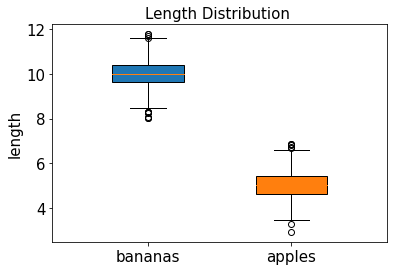

In [154]:
feature = 'length'
plt.boxplot(x=feature, data=fruits.loc[fruits['class'] == 0],
            patch_artist=True, boxprops={'facecolor': 'tab:blue'},
            positions=[0], labels=['bananas'], widths=[0.15])
plt.boxplot(x=feature, data=fruits.loc[fruits['class'] == 1],
            patch_artist=True, boxprops={'facecolor': 'tab:orange'},
            positions=[0.3], labels=['apples'], widths=[0.15])
plt.ylabel('length')
plt.xlim(-0.2, 0.5)
plt.title('Length Distribution ')

Text(0.5, 0, 'Width')

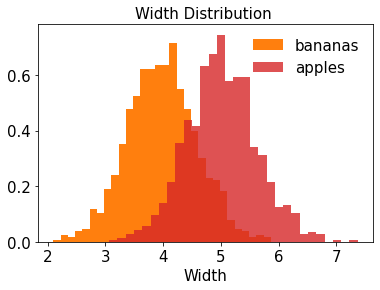

In [155]:
feature = 'width'

plt.hist(x=feature, data=fruits.loc[fruits['class'] == 0],bins=30, density=True, color='tab:orange', label='bananas',)
plt.hist(x=feature, data=fruits.loc[fruits['class'] == 1],bins=30, density=True, color='tab:red', label='apples', alpha=0.8)
plt.legend(frameon=False)
plt.title('Width Distribution ')
plt.xlabel('Width')

Text(0.5, 0, 'L/W ratio')

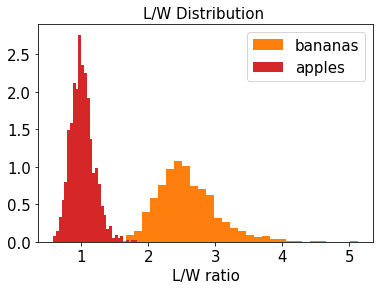

In [156]:
feature = 'L/W'
fruits[feature] = fruits['length']/fruits['width']

plt.hist(x=feature, data=fruits.loc[fruits['class'] == 0],bins=30, density=True, color='tab:orange', label='bananas',)
plt.hist(x=feature, data=fruits.loc[fruits['class'] == 1],bins=30, density=True, color='tab:red', label='apples',)
plt.legend()
plt.title('L/W Distribution ')
plt.xlabel('L/W ratio')

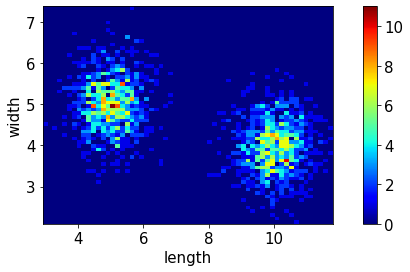

In [157]:
fig, (ax, cax) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 0.05]})
_, _, _, mappable = ax.hist2d(x='length', y='width', bins=60, data=fruits, cmap=plt.cm.jet)
ax.set_xlabel('length')
ax.set_ylabel('width')

plt.colorbar(mappable=mappable, cax=cax, ax=ax)

Text(0.5, 0, 'Area')

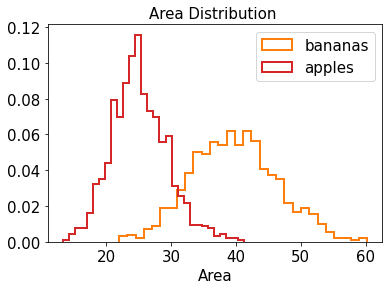

In [168]:
feature ="Area"
fruits[feature] = fruits['length']*fruits['width']
plt.hist(x=feature, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=2, bins=30, density=True, color='tab:orange', label='bananas')
plt.hist(x=feature, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=2, bins=30, density=True, color='tab:red', label='apples')
plt.title('Area Distribution ')
plt.legend()
plt.xlabel('Area')

Text(0.5, 0, 'Circumference')

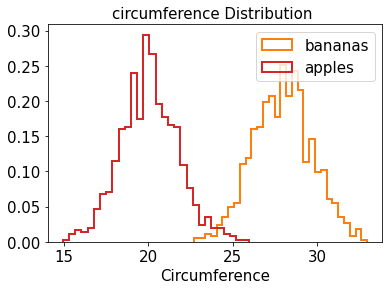

In [169]:
feature = 'circumference'
fruits[feature] = 2*(fruits['length']+fruits['width'])
plt.hist(x=feature, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=2, bins=30, density=True, color='tab:orange', label='bananas')
plt.hist(x=feature, data=fruits.loc[fruits['class'] == 1], histtype='step',lw=2, bins=30, density=True, color='tab:red', label='apples')
plt.title('circumference Distribution ')
plt.legend()
plt.xlabel('Circumference')